In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv(r"C:\Users\chinc\Downloads\archive\Admission_Predict_Ver1.1.csv") 

In [3]:
display(data.head())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
summary = data.describe(include='all')
display(summary)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
# Additional statistics
print("\nAdditional Statistics:")
for col in data.select_dtypes(include=[np.number]).columns:
    print(f"{col}: Range = {data[col].max() - data[col].min()}")
    print(f"{col}: Variance = {data[col].var()}")



Additional Statistics:
Serial No.: Range = 499
Serial No.: Variance = 20875.0
GRE Score: Range = 50
GRE Score: Variance = 127.58037675350703
TOEFL Score: Range = 28
TOEFL Score: Variance = 36.98911422845691
University Rating: Range = 4
University Rating: Variance = 1.3076192384769538
SOP: Range = 4.0
SOP: Variance = 0.9820881763527054
LOR : Range = 4.0
LOR : Variance = 0.8564569138276554
CGPA: Range = 3.12
CGPA: Variance = 0.36579852344689373
Research: Range = 1
Research: Variance = 0.24689378757515032
Chance of Admit : Range = 0.6299999999999999
Chance of Admit : Variance = 0.019920613627254505


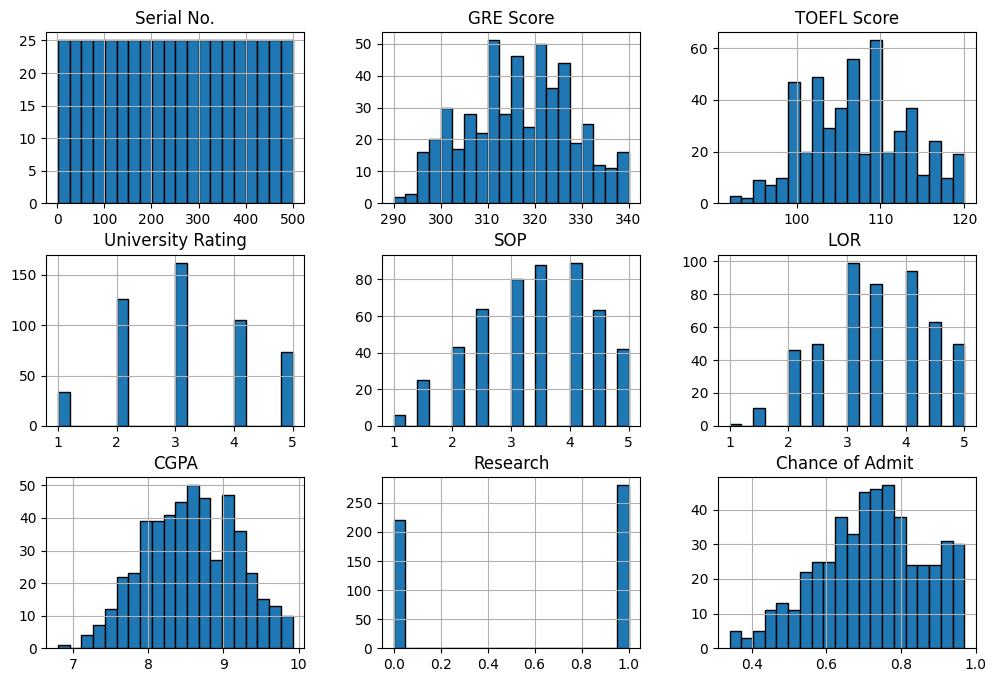

In [6]:
# Plot histograms for each feature
data.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.show()

In [7]:
# Data Cleaning - Handle missing values
data.fillna(data.median(), inplace=True)

In [8]:
# Encode categorical variables if any
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [9]:
# Feature scaling
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [13]:
# Ensure the target variable is categorical for classification
y = pd.qcut(data.iloc[:, -1], q=4, labels=[0, 1, 2, 3])  # Discretizing into 4 bins

In [14]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Model building - Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [16]:
# Predictions
y_pred = model.predict(X_test)


In [17]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

